In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [39]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [40]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [41]:
class_names=datasets.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

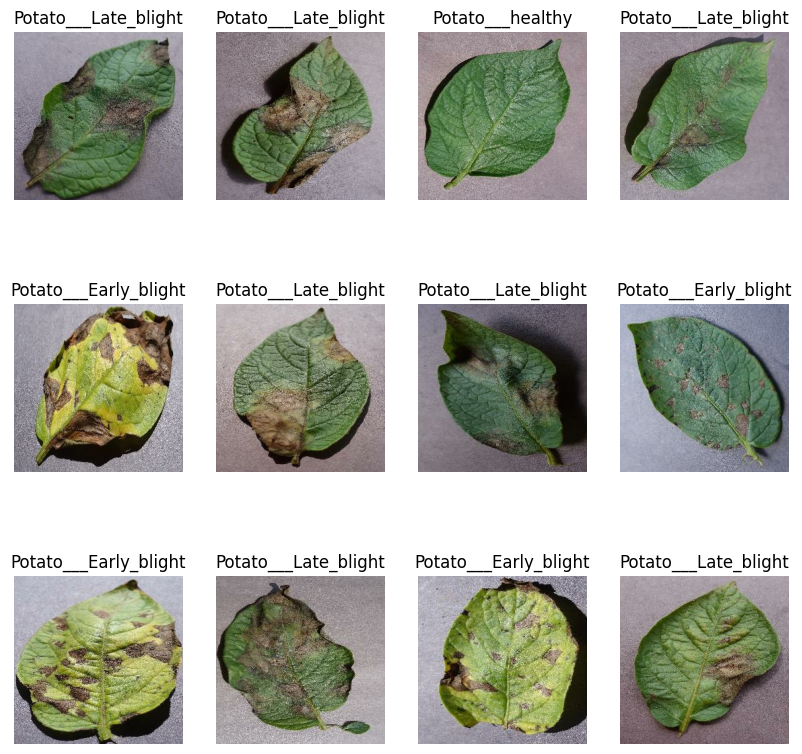

In [42]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in datasets.take(1):
    for i in range(12):
      ax=plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

In [43]:
EPOCHS=50
train_size=0.8 # 80% of data will be used for training and 10% will be used for validation and 10% for the test dataset
len(datasets)*train_size

54.400000000000006

In [44]:
train_ds=datasets.take(54)
len(train_ds)

54

In [45]:
test_ds=datasets.skip(54)
len(test_ds)

14

In [46]:
val_size=0.1
len(datasets)*val_size

6.800000000000001

In [47]:
val_ds=test_ds.take(6)
len(val_ds)  

6

In [48]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [49]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
     if shuffle:
          ds = ds.shuffle(shuffle_size, seed=12)
     ds_size=len(ds)
     train_size=int(train_split*ds_size)
     val_size=int(val_split*ds_size)

     
     train_ds=ds.take(train_size)
     val_ds=ds.skip(train_size).take(val_size)
     test_ds=ds.skip(train_size).skip(val_size)
     return train_ds,val_ds,test_ds

In [50]:
train_ds, val_ds ,test_ds = get_dataset_partitions_tf(datasets)

In [51]:
len(train_ds)

54

In [52]:
len(test_ds)

8

In [53]:
len(val_ds)

6

In [54]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [55]:
#building the layers for the usecase int he model

resize_and_scale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [56]:
data_augumentation= tf.keras.Sequential([
    layers.RandomFlip("horizontol_and_vertical"),
    layers.RandomRotation(0.2)
])

In [57]:
#Now I am buiding the Model with the help of the CNN
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3) # channles =3 here
model=models.Sequential([
    resize_and_scale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')  #softmax normalize the probability of the classes
])
#Now I am building the model
model.build(input_shape=input_shape)


C:\Users\Kushagra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 60, 60, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 30, 30, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 115200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 128)              │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,266 (56.61 MB)

 Trainable params: 14,840,266 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
history=model.fit(
    train_ds,
    epochs=EPOCHS-40,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/10


54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 987ms/step - accuracy: 0.5663 - loss: 1.2305 - val_accuracy: 0.7083 - val_loss: 0.6872
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8598 - loss: 0.3551 - val_accuracy: 0.9323 - val_loss: 0.1838
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8835 - loss: 0.2798 - val_accuracy: 0.9167 - val_loss: 0.2573
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9105 - loss: 0.2020 - val_accuracy: 0.9740 - val_loss: 0.0919
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9376 - loss: 0.1454 - val_accuracy: 0.9271 - val_loss: 0.1593
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 993ms/step - accuracy: 0.9628 - loss: 0.1187 - val_accuracy: 0.8750 - val_loss: 0.2735
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9556 - loss: 0.1202 - val_accuracy: 0.9531 - val_loss: 0.1381
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 787ms/step - accuracy: 0.9578 - loss: 0.1066 - val_accuracy: 0.9479 - val_loss: 0

In [61]:
scores=model.evaluate(test_ds)  

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.9219 - loss: 0.1732


In [62]:
scores

[0.1566249430179596, 0.93359375]

In [63]:
history

In [64]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [65]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [66]:
history.history['accuracy']

[0.7083333134651184,
 0.8726851940155029,
 0.8854166865348816,
 0.9270833134651184,
 0.9380787014961243,
 0.9571759104728699,
 0.9629629850387573,
 0.9594907164573669,
 0.9560185074806213,
 0.9467592835426331]

In [67]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['loss']

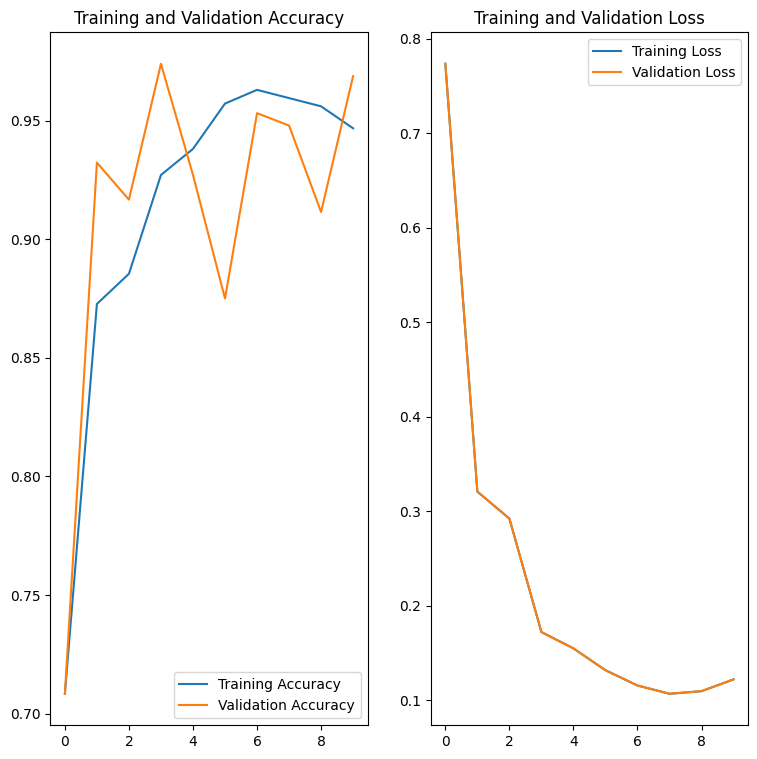

In [68]:
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS-40),acc,label='Training Accuracy')
plt.plot(range(EPOCHS-40),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS-40),loss,label='Training Loss')
plt.plot(range(EPOCHS-40),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict : 
Actual Label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
predicted label :  Potato___Early_blight


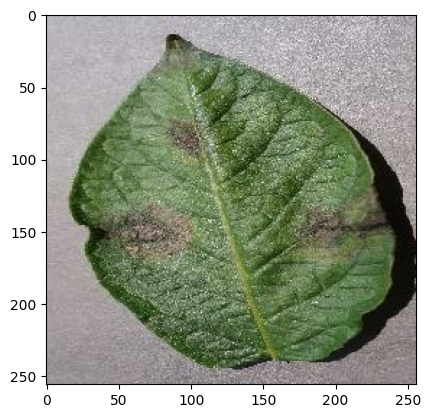

In [69]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    print("first image to predict : ")
    plt.imshow(first_image)
    print("Actual Label : ",class_names[first_label])
    batch_prediction=model.predict(image_batch)
    print("predicted label : ",class_names[np.argmax(batch_prediction[0])])



In [70]:
def predict(model, image):
    # Load the image
    img_array = tf.keras.preprocessing.image.img_to_array(image)  # Corrected this line
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


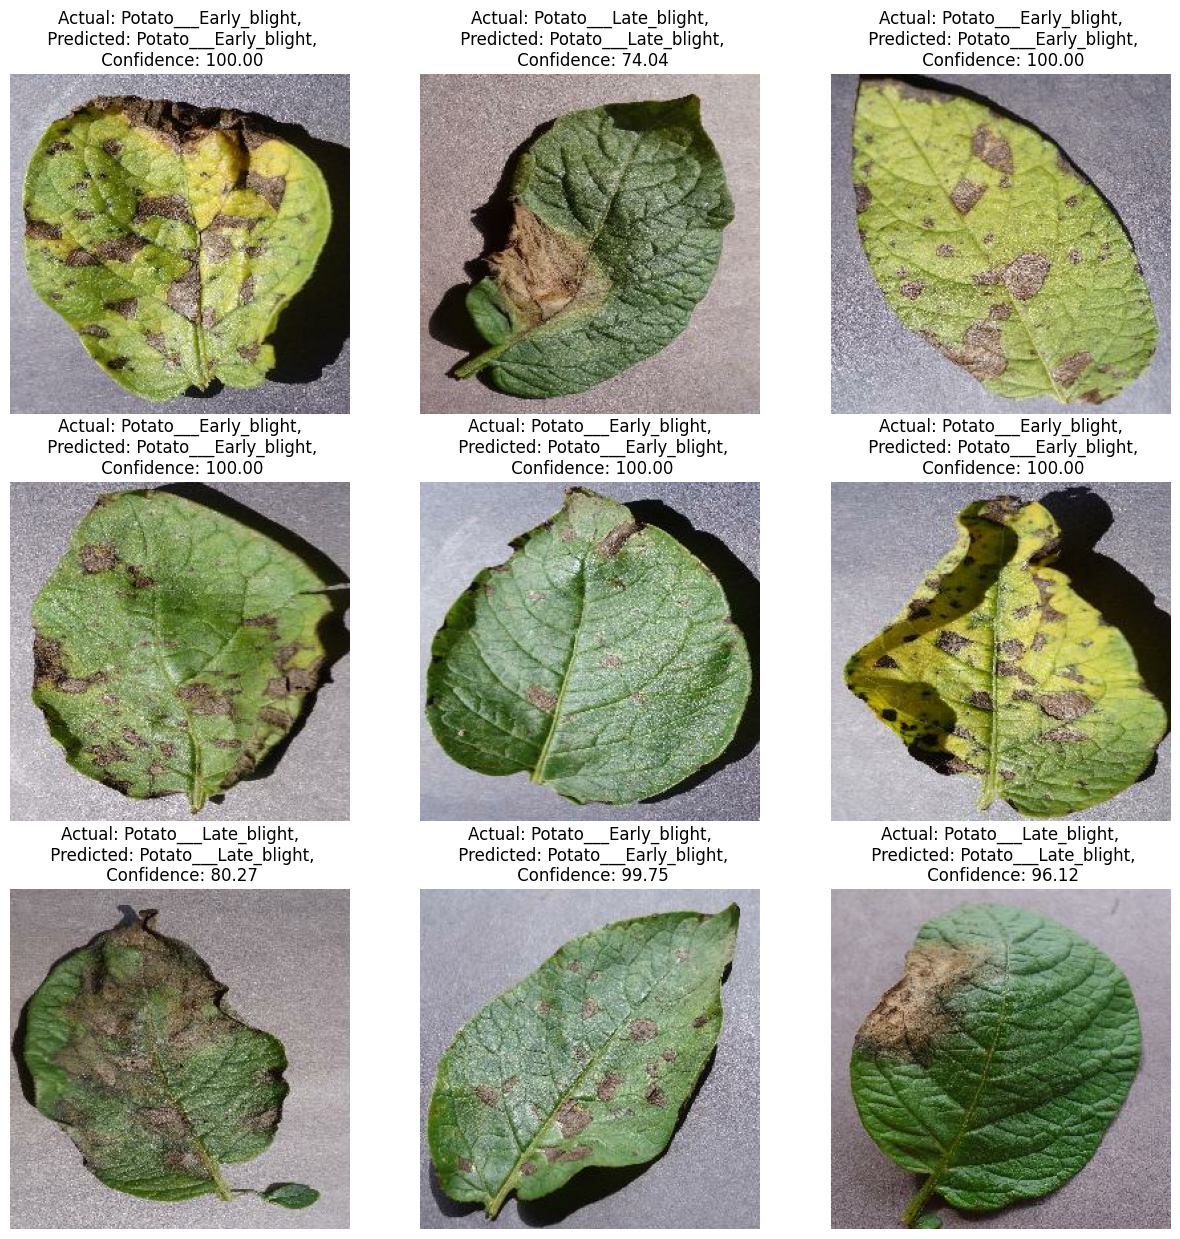

In [71]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())  # Pass the image directly
        actual_class = class_names[labels[i].numpy()]  # Convert label to numpy
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence:.2f}")
        plt.axis("off")

In [74]:
model_version="dpl"
model.export(f"../models/{model_version}")
# import pickle

# # Assuming 'model' is your trained model
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)

INFO:tensorflow:Assets written to: ../models/dpl\assets


INFO:tensorflow:Assets written to: ../models/dpl\assets


Saved artifact at '../models/dpl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2329348172368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348173136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348172560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348171024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348168528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348170064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348168720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348174672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329352454800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348176400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2329348170256: TensorSpec(shape=(